In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud

In [2]:
df = pd.read_excel("/kaggle/input/scotiabank-challenge/Winter 2024 Scotia DSD Data Set.xlsx")

In [3]:
df.head()

,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review
0,0,2022-04-20 11:38:29,1,en,20.37.2,0,"Worst bank on the planet. Liars, cheats, and t..."
1,1,2023-03-25 19:10:42,5,en,20.47.0,0,App is great.
2,2,2022-05-31 00:54:40,1,en,20.38.1,0,Barely works. Barely. Stopped giving out notif...
3,3,2021-06-18 13:16:44,5,en,20.27.0,0,Really easy for a technophobe
4,4,2023-11-29 13:54:17,1,en,2310.0.1,0,Sucks


In [4]:
df.describe()

,Review_ID,Date,Rating,Review_Likes
count,9176.000000,9176,9176.000000,9176.000000
mean,4587.500000,2022-07-03 15:28:23.711639040,3.222646,1.042829
min,0.000000,2021-01-01 01:41:22,1.000000,0.000000
25%,2293.750000,2021-08-31 21:11:39,1.000000,0.000000
50%,4587.500000,2022-06-16 09:19:03,4.000000,0.000000
75%,6881.250000,2023-05-05 00:14:12,5.000000,0.000000
max,9175.000000,2024-01-22 20:50:02,5.000000,236.000000
std,2649.027369,NaN,1.795973,7.187911


In [5]:
df.isna().sum()

Review_ID            0
Date                 0
Rating               0
Review_Language      0
Version            693
Review_Likes         0
Review               0
dtype: int64

In [6]:
df["Version"].unique()

array(['20.37.2', '20.47.0', '20.38.1', '20.27.0', '2310.0.1', '20.30.1',
       '20.37.1', '20.21.1', '2311.0.1', '20.48.0', '2311.0.0',
       '2309.0.0', nan, '20.43.0', '20.34.3', '20.26.0', '20.24.0',
       '2305.0.0', '20.36.0', '20.25.1', '20.28.0', '20.32.0', '20.39.1',
       '20.41.0', '20.23.0', '20.36.2', '20.34.1', '20.42.1', '20.44.2',
       '20.36.1', '20.35.0', '20.45.1', '20.34.4', '20.46.1', '20.29.0',
       '20.40.1', '20.31.1', '20.44.4', '20.33.2', '20.39.0', '2306.0.1',
       '2305.1.0', '20.38.0', '20.43.2', '20.46.2', '2308.0.0',
       '2307.0.0', '20.49.1', '2307.0.1', '20.19.0', '20.4.0', '20.15.2',
       '20.20.2', '20.44.3', '2306.0.2', '20.45.0', '20.11.1', '20.49.2',
       '20.11.3', '20.31.0', '20.2.00', '20.0.3', '20.44.1', '20.9.2',
       '20.33.0', '20.16.1', '20.15.1', '20.14.0', '20.25.0', '20.6.2',
       '20.43.1', '20.1.20', '20.13.1', '20.20.1', '20.11.2', '20.18.0',
       '20.44.0', '20.17.1', '20.5.0', '20.30.0', '20.21.0', '20.8.1',
 

# EDA and Feature Engineering

#### Language column

In [7]:
print(df["Review_Language"].unique())
df[df["Review_ID"] == 430]

['en']


,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review
430,430,2022-12-21 09:51:38,5,en,20.45.1,0,Muy clara y buenísima!


The language column is inaccurate and only have 1 value

In [8]:
df = df.drop("Review_Language", axis=1)

#### Review Likes

In [9]:
print(df["Review_Likes"].value_counts().values)
print(df["Review_Likes"].value_counts().index)

[7471  952  251  120   58   44   30   18   17   15   15   13   12   12
   11   11    9    7    7    5    5    5    4    4    4    4    3    3
    3    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1]
Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,   7,  13,  11,  10,  19,
        12,  17,  18,  14,  15,  16,  20,  23,  22,  21,  47,  26,  54,  27,
        29,  52,  61,  60,  25,  28,  39,  41,  38,  48,  44,  24,  62,  36,
        31, 121,  87,  45,  43, 229,  58, 145,  94,  90,  66,  55,  83,  92,
       224,  79, 236,  81,  34,  57,  68, 104,  40,  63,  88,  35,  73,  30,
        67, 148,  51,  65,  80],
      dtype='int64', name='Review_Likes')


We exclude 1-5 likes review in the visualization due to extreme high frequency and their potentially unsignificant influence

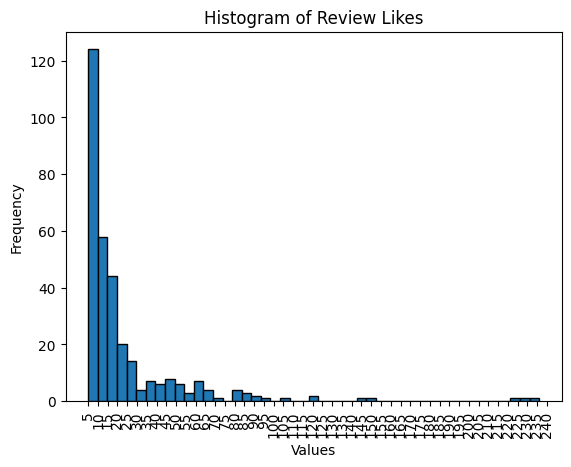

In [10]:
data = df[df["Review_Likes"] >= 5]["Review_Likes"].values
bin_width = 5
num_bins = int((max(data) - min(data)) / bin_width) + 1
bins = np.arange(min(data), max(data) + bin_width, bin_width)

plt.hist(data, bins=num_bins, edgecolor='black')
plt.title('Histogram of Review Likes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(bins, rotation='vertical')
plt.show()

#### Version and Date

I want to see what version belong to which period of time

In [11]:
df["Date full"] = df["Date"].apply(lambda x: x.date())
df["Time"] = df["Date"].apply(lambda x: x.time())
df["Year"] = df["Date"].apply(lambda x: x.year)
df["Month"] = df["Date"].apply(lambda x: x.month)

In [12]:
df = df.sort_values('Date')

In [13]:
def hist_year_version(year):
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))

    for i in range(1, 13):
        categories = df[(df["Year"]==year) & (df["Month"]==i)]["Version"].value_counts().keys()
        cnt = df[(df["Year"]==year) & (df["Month"]==i)]["Version"].value_counts().values

        row = (i - 1) // 4
        col = (i - 1) % 4

        axs[row, col].bar(categories, cnt)
        axs[row, col].set_title("Version Count for " + str(year) + "-" + str(i))
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

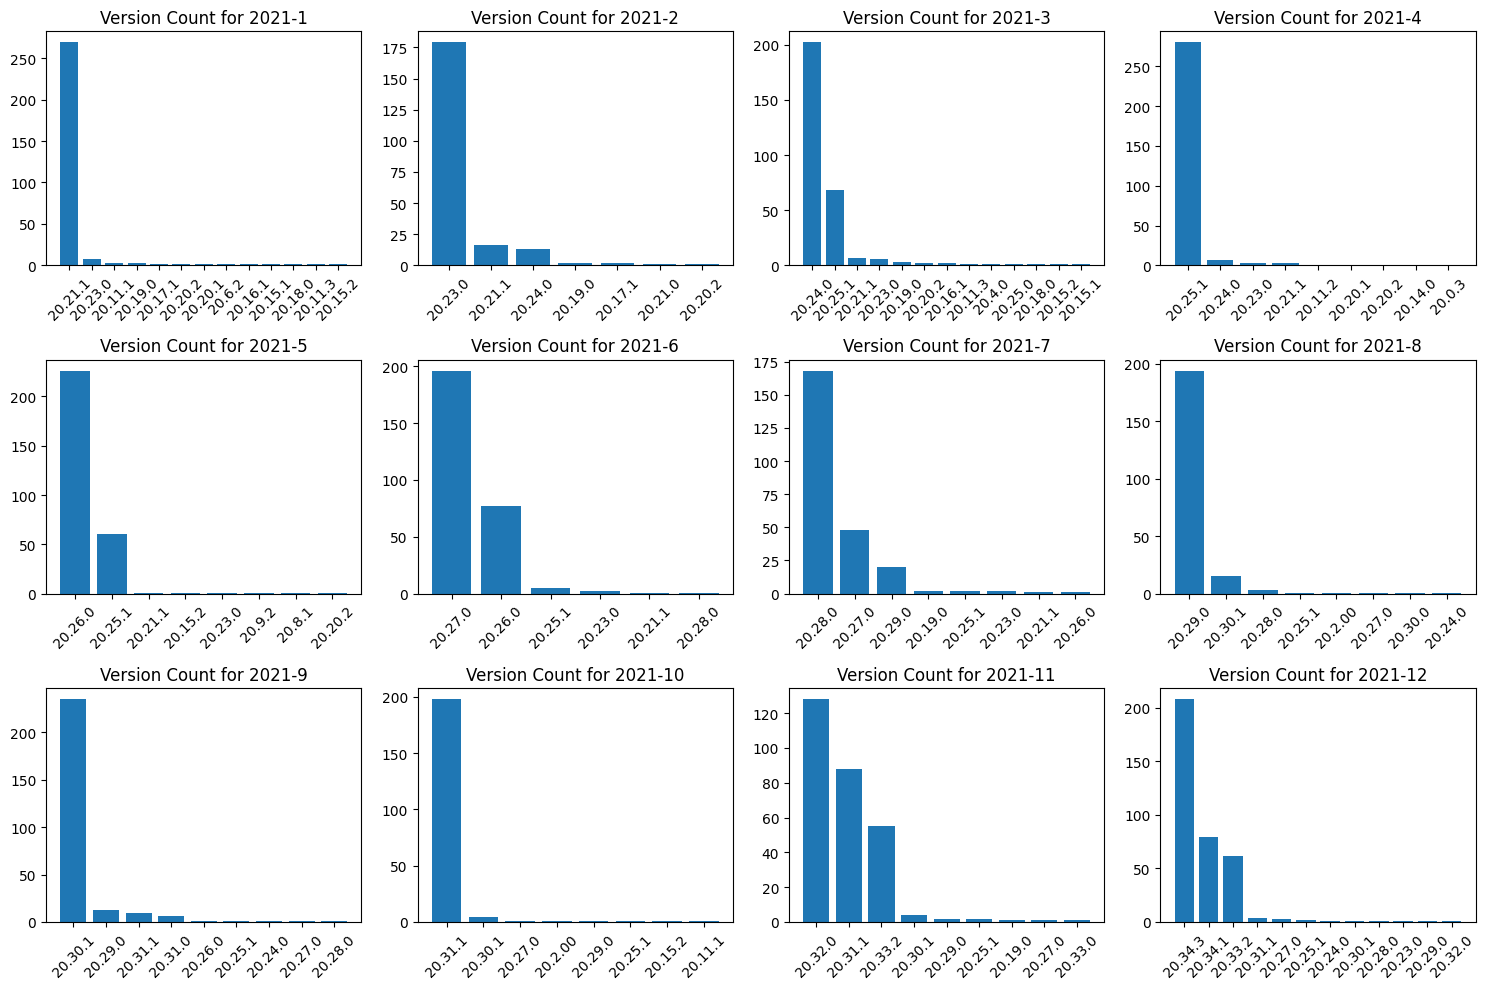

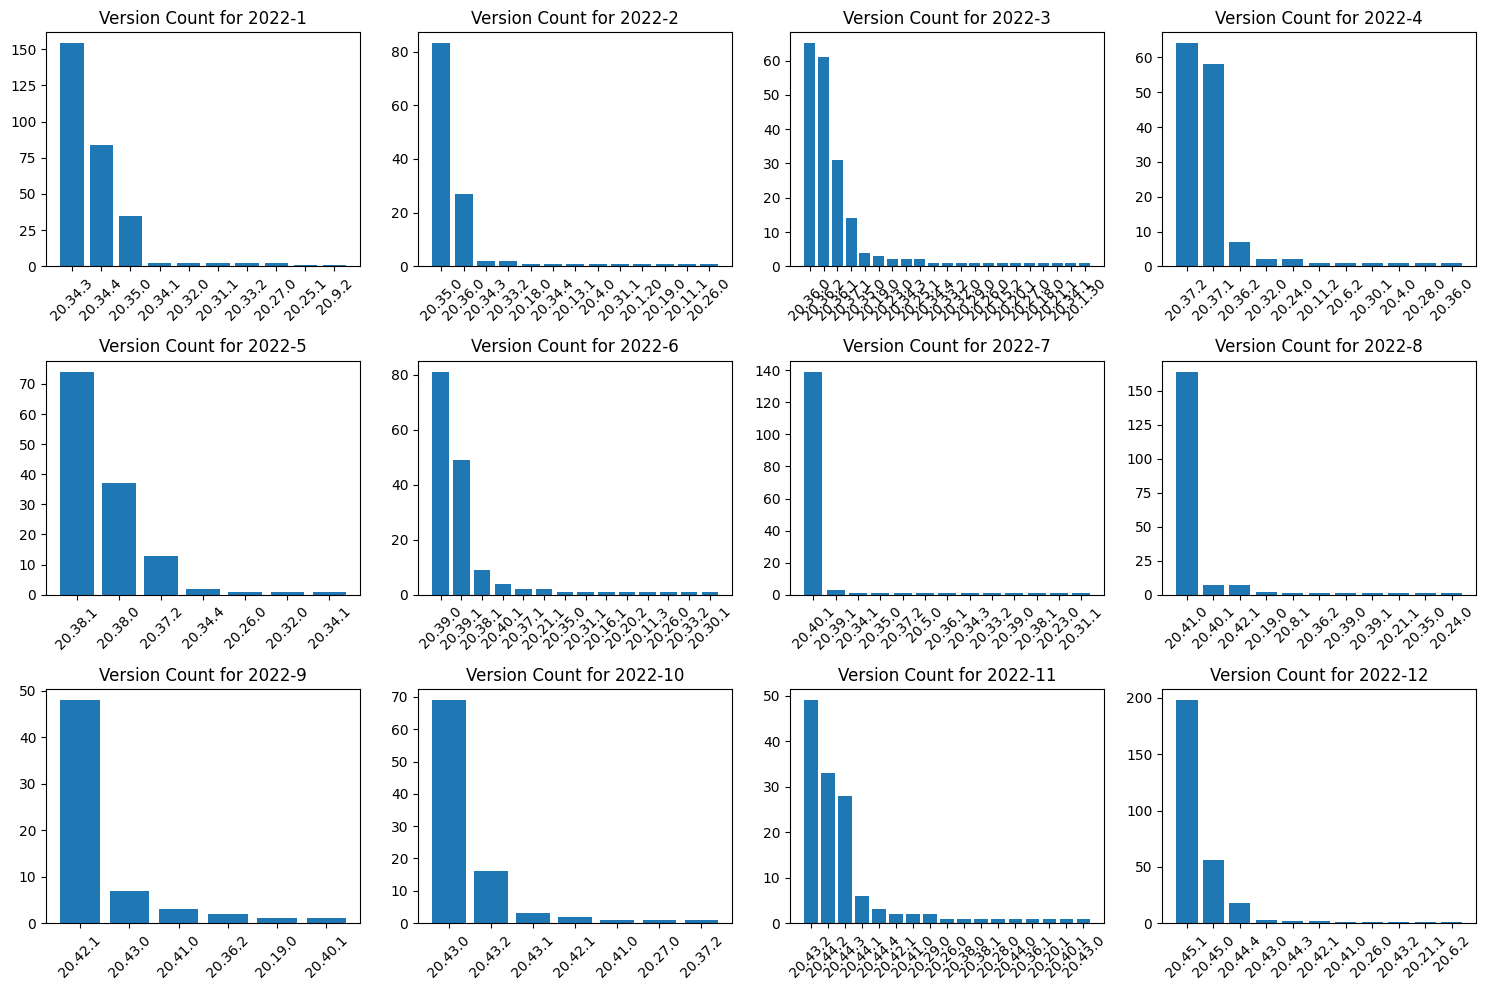

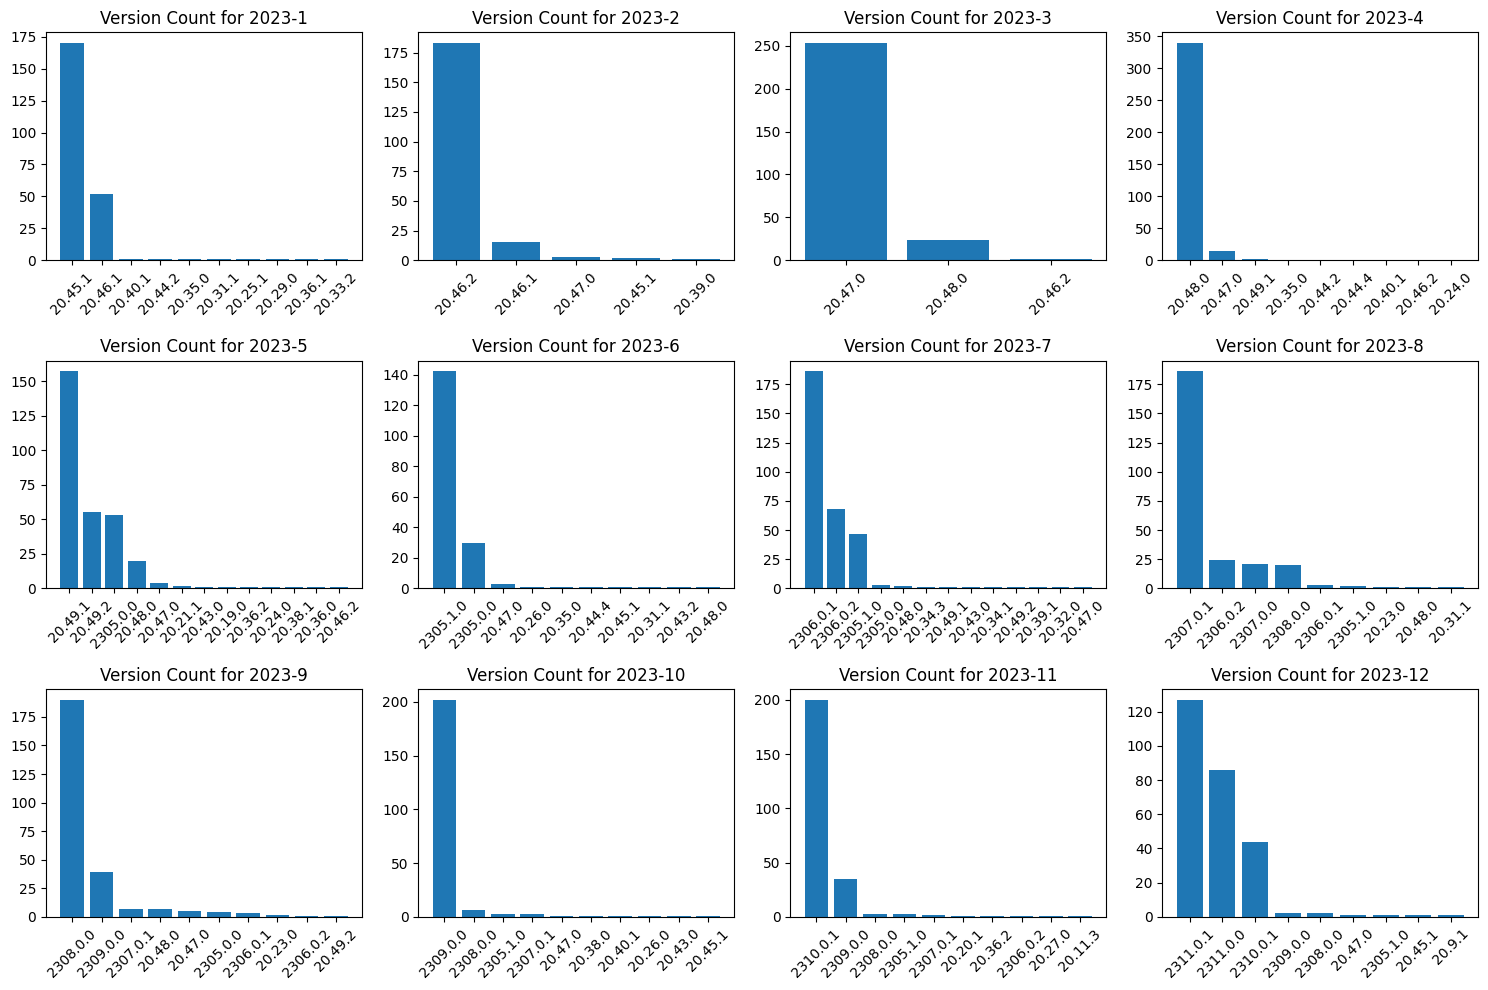

In [14]:
hist_year_version(2021)
hist_year_version(2022)
hist_year_version(2023)

As we can see reviews that are posted close together have same version, and there are at least 1 new version every month. My idea is to assign NaN values the version that is most popular around that time.

In [15]:
range_consideration = 10
df = df.fillna(-1)
date_lst = list(df["Date full"].values)
version_lst = list(df["Version"].values)

In [16]:
def most_frequent(lst):
    hash_map = {}
    for i in range(len(lst)):
        if lst[i] not in hash_map.keys():
            hash_map[lst[i]] = 1
        else:
            hash_map[lst[i]] += 1
            
    val_lst = list(hash_map.values())
    argmax = np.argmax(val_lst)
    return list(hash_map.keys())[argmax]

new_version_lst = []
for i in range(len(version_lst)):
    if version_lst[i] == -1:
        last5 = new_version_lst[:-5]
        forward5 = version_lst[i+1:i+6]
        new_version_lst.append(most_frequent(last5 + forward5))
    else:
        new_version_lst.append(version_lst[i])

In [17]:
df["Version"] = new_version_lst

In [18]:
df.isna().sum()

Review_ID       0
Date            0
Rating          0
Version         0
Review_Likes    0
Review          0
Date full       0
Time            0
Year            0
Month           0
dtype: int64

#### Rating and Date and Version

I want to see what period of time and what version is most well received or hate

In [19]:
def bar_year_rating(year):

    for j in range(1, 13):
        df_rating_version = df[(df["Year"]==year) & (df["Month"]==j)][["Version", "Rating"]].value_counts().reset_index(name="Count")

        categories = df_rating_version["Version"]
        rating = df_rating_version["Rating"]
        cnt = df_rating_version["Count"]
        
        review_likes = list(df[(df["Year"]==year) & (df["Month"]==j)]["Review_Likes"].values)
        rating_lst = list(df[(df["Year"]==year) & (df["Month"]==j)]["Rating"].values)
        
        weight_lst = [0,0,0,0,0]
        
        for k in range(len(rating_lst)):
            weight_lst[rating_lst[k]-1] += review_likes[k]
        total = sum(weight_lst)
        
        bar_map = {}
        for i in range(len(categories)):
            if categories[i] not in bar_map.keys():
                if rating[i] == 1:
                    bar_map[categories[i]] = [cnt[i] * weight_lst[0]/total,0,0,0,0]
                if rating[i] == 2:
                    bar_map[categories[i]] = [0,cnt[i] * weight_lst[1]/total,0,0,0]
                if rating[i] == 3:
                    bar_map[categories[i]] = [0,0,cnt[i] * weight_lst[2]/total,0,0]
                if rating[i] == 4:
                    bar_map[categories[i]] = [0,0,0,cnt[i] * weight_lst[3]/total,0]
                if rating[i] == 5:
                    bar_map[categories[i]] = [0,0,0,0,cnt[i] * weight_lst[4]/total]
            else:
                bar_map[categories[i]][rating[i]-1] += cnt[i] * weight_lst[rating[i]-1] / total

        N = len(bar_map.keys())
        ind = np.arange(N)  
        width = 0.1
        color_lst = ["r", "y", "orange", "g", "b"]
        bar_plt = []
#         print(weight_lst)
#         print(bar_map)

        for i in range(5):
            xvals = []
            for star in list(bar_map.values()):
                xvals.append(star[i])
            bar = plt.bar(ind + width * (i+1), xvals, width, color = color_lst[i])
            bar_plt.append(bar)
        plt.xticks(ind+width,list(bar_map.keys()), rotation=45)
        plt.title("Year " + str(year) + " Month " + str(j))
        plt.legend(bar_plt, ["1 star", "2 star", "3 star", "4 star", "5 star"])
        plt.ylabel("Weighted Frequency")
        plt.xlabel("Version")
        plt.show()

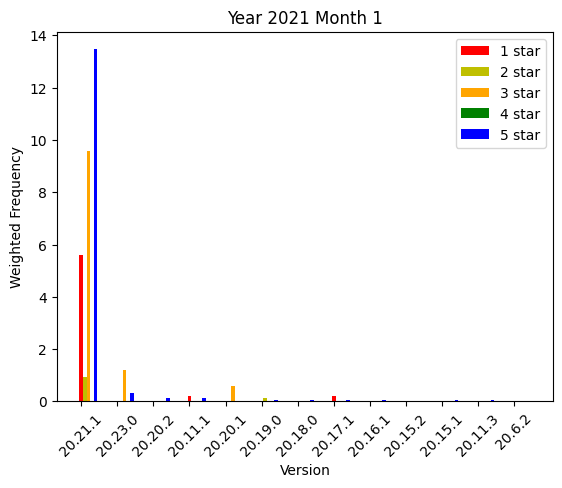

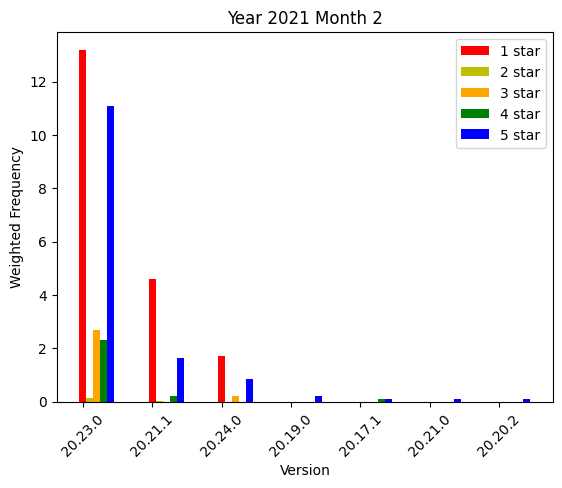

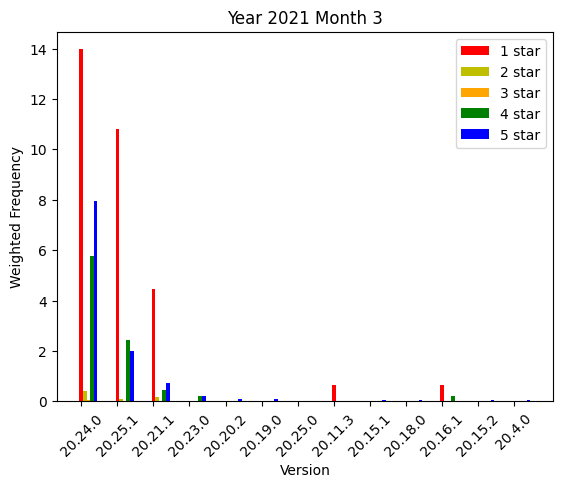

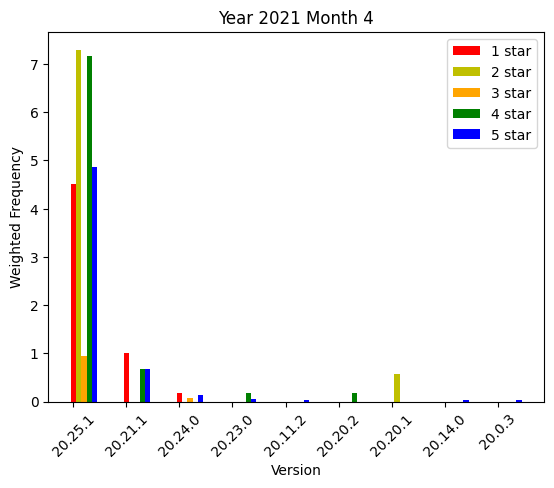

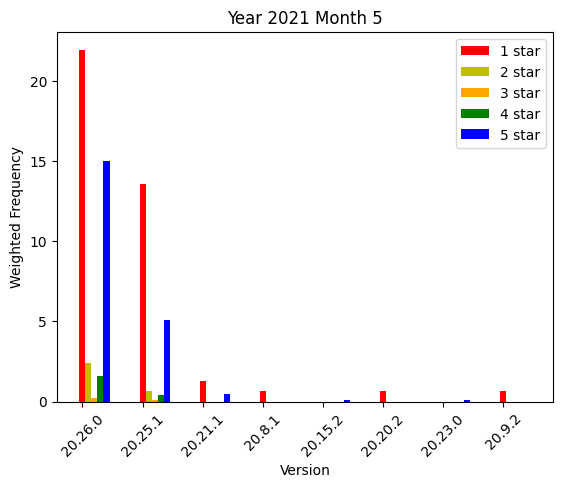

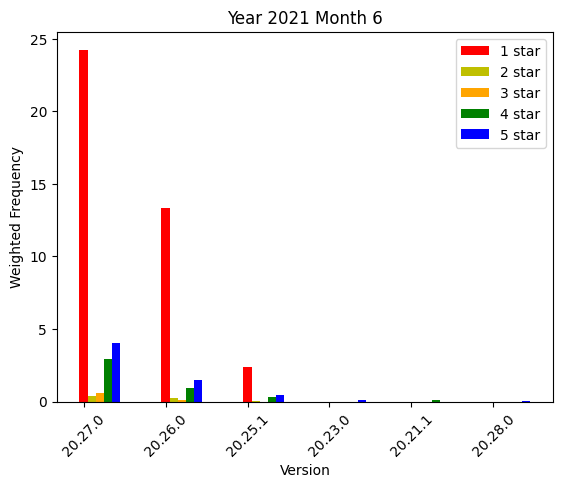

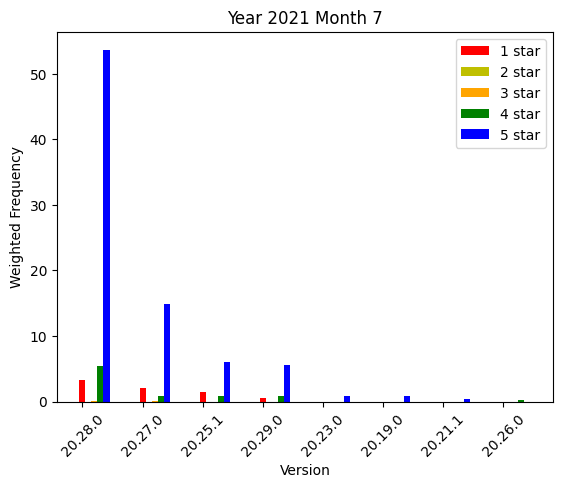

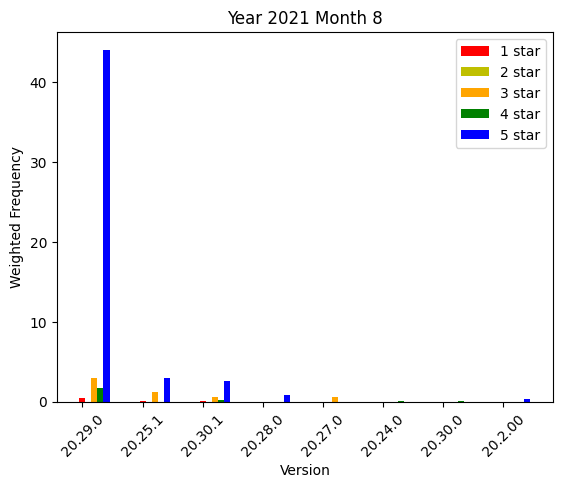

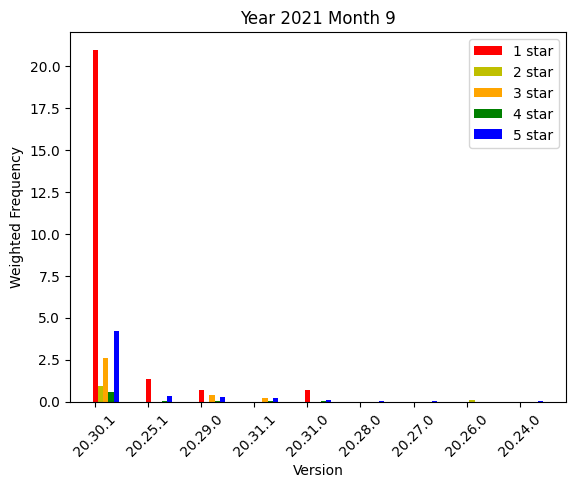

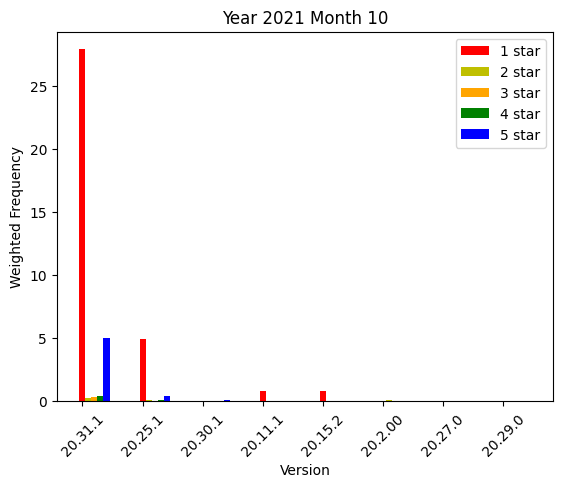

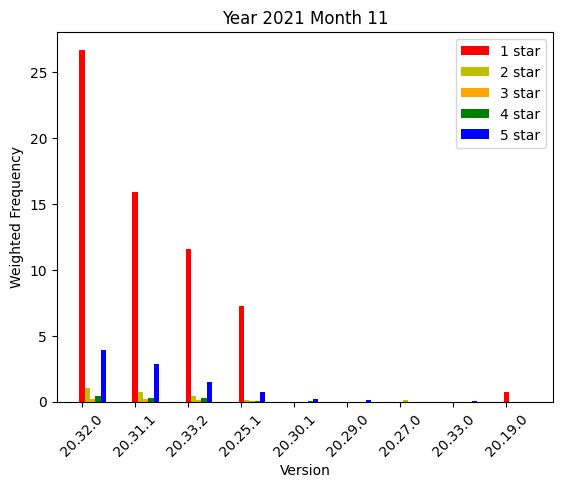

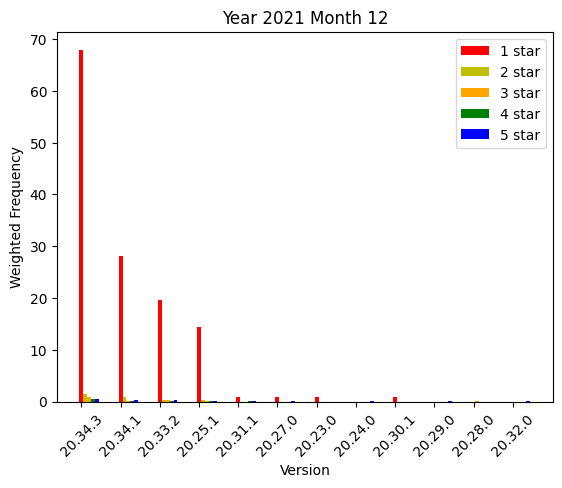

In [20]:
bar_year_rating(2021)

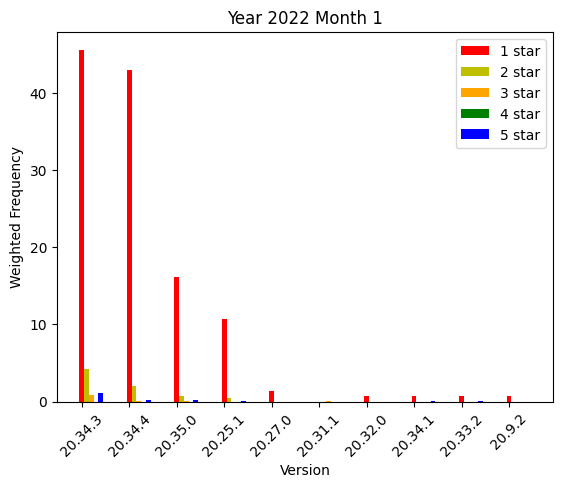

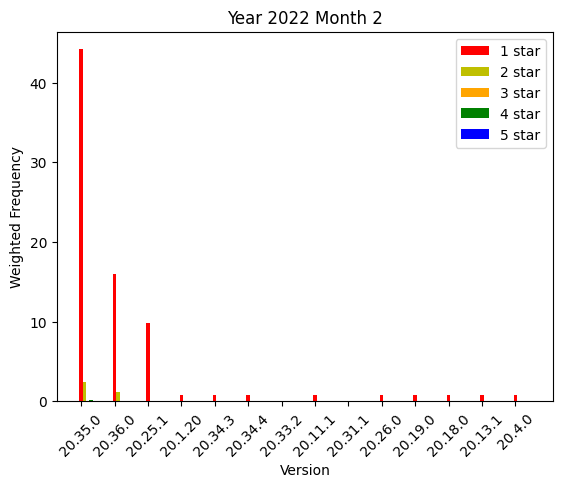

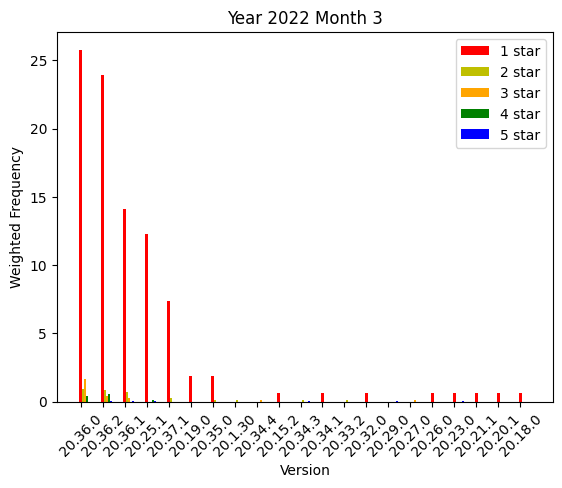

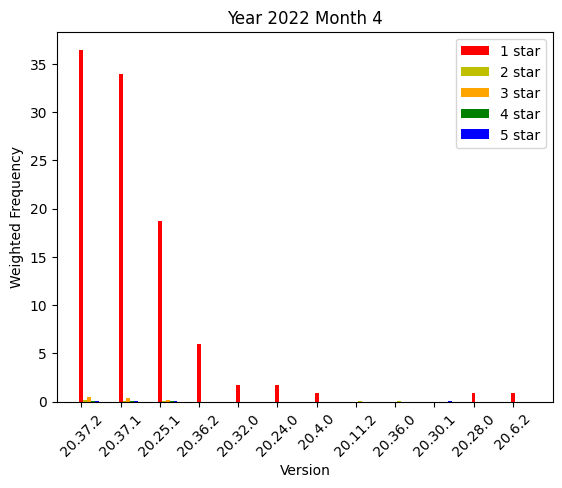

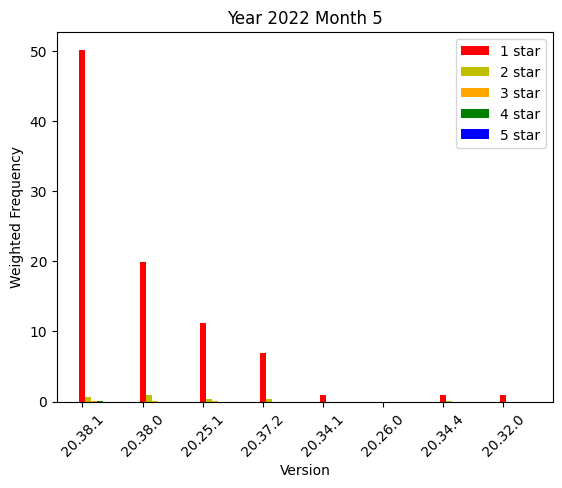

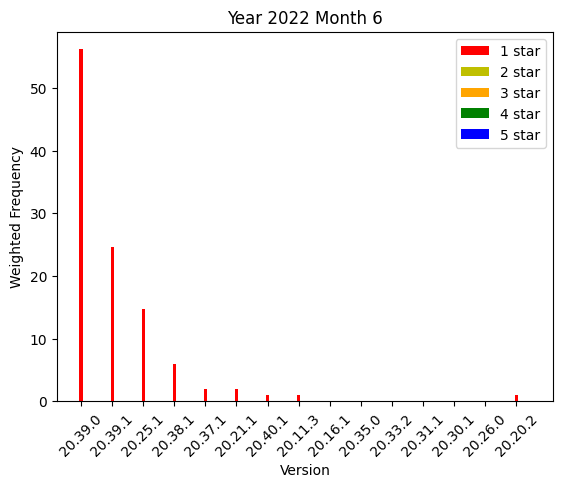

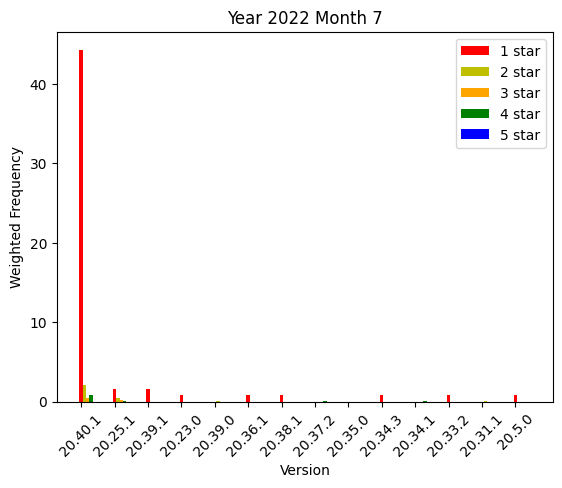

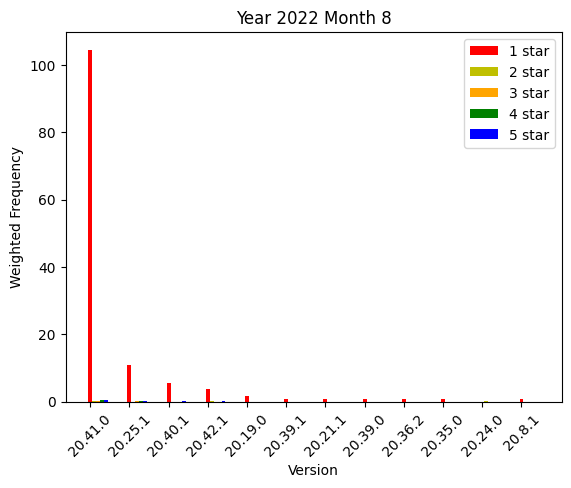

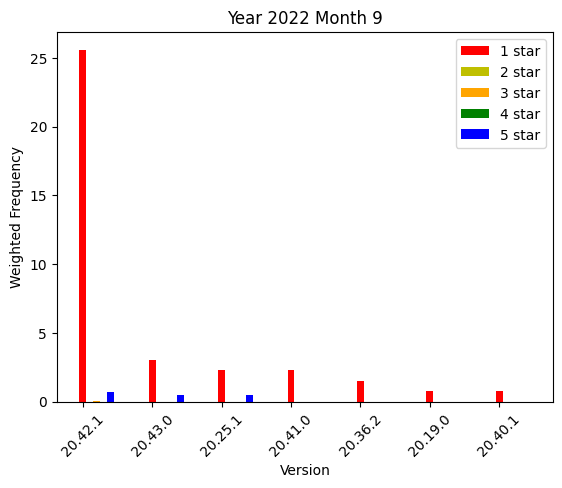

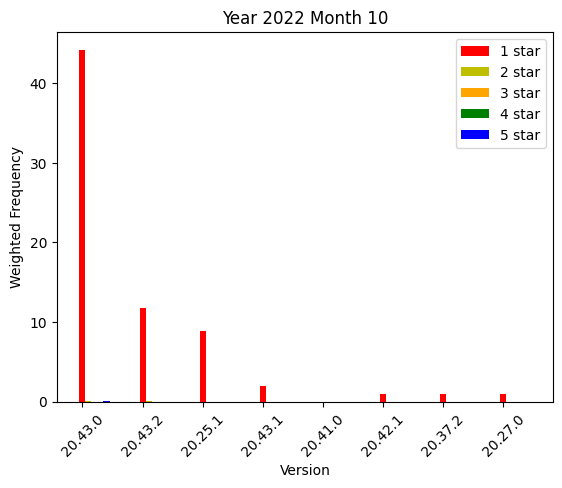

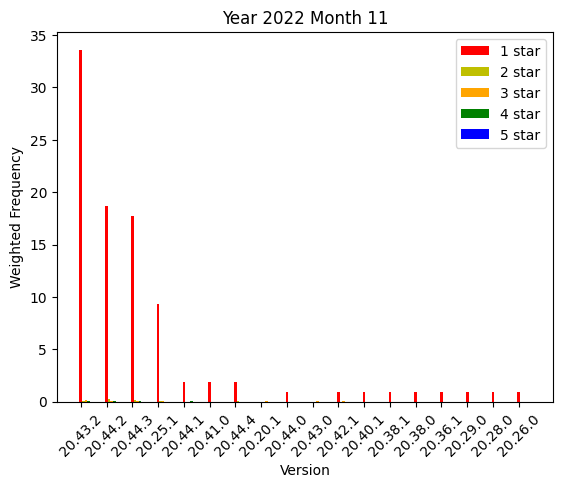

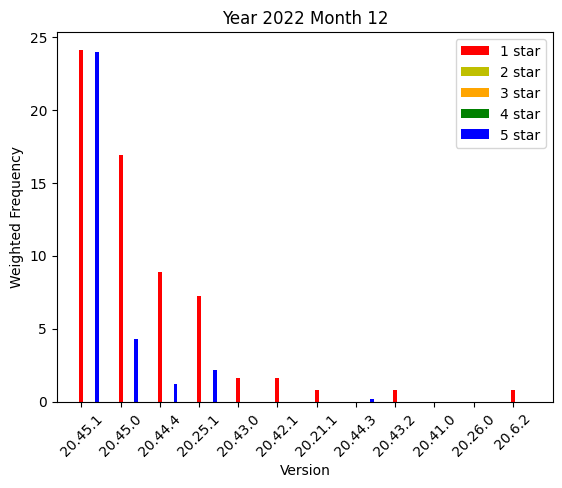

In [21]:
bar_year_rating(2022)

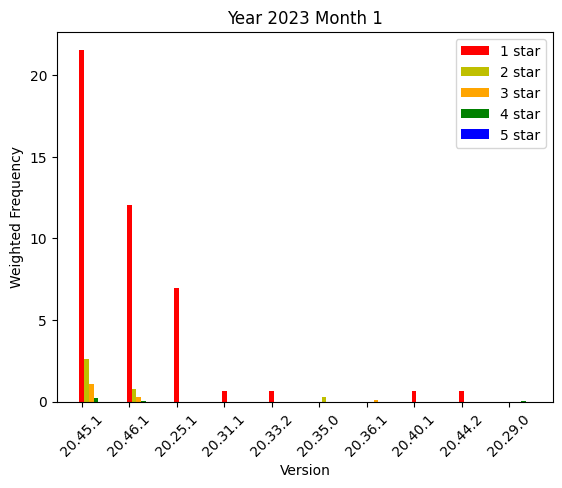

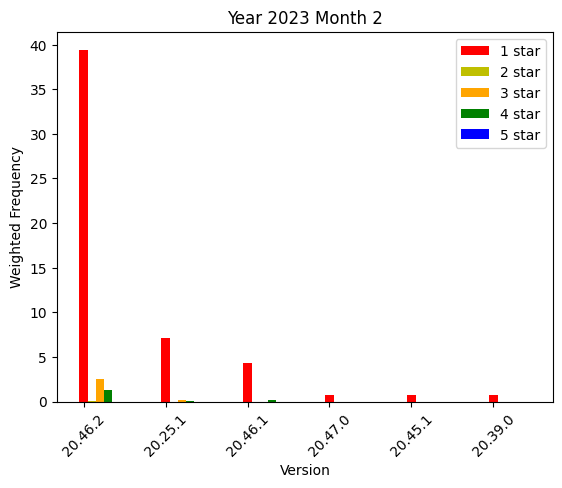

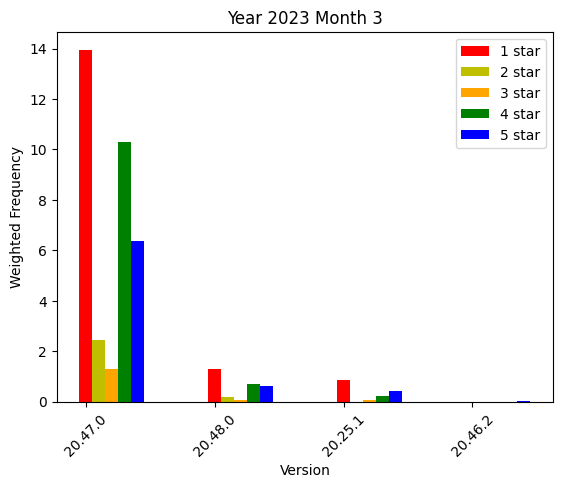

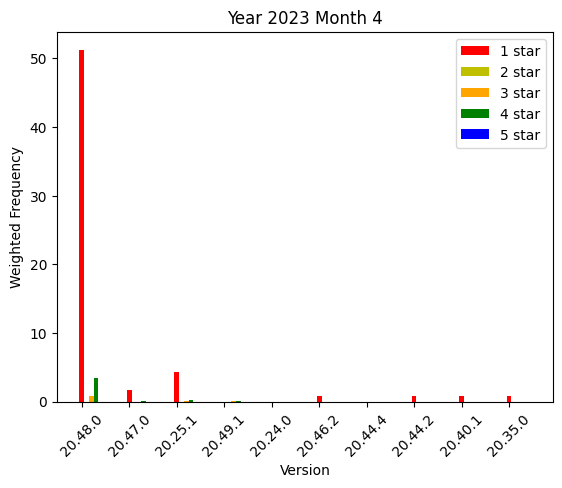

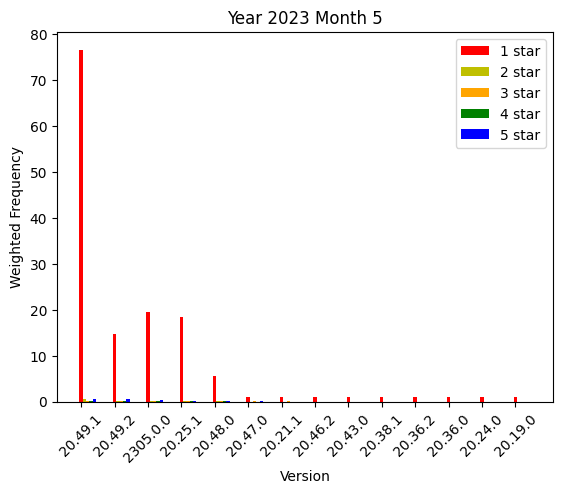

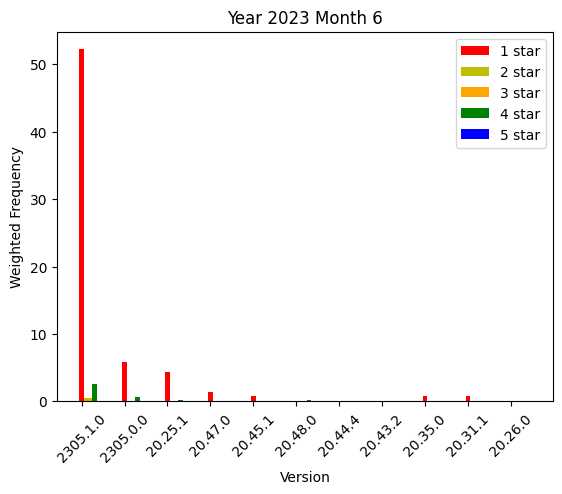

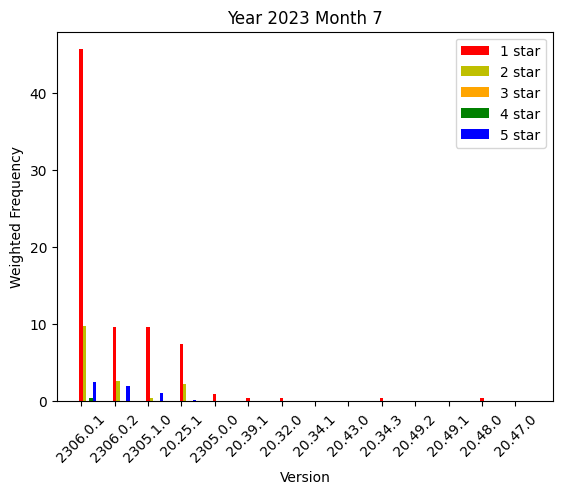

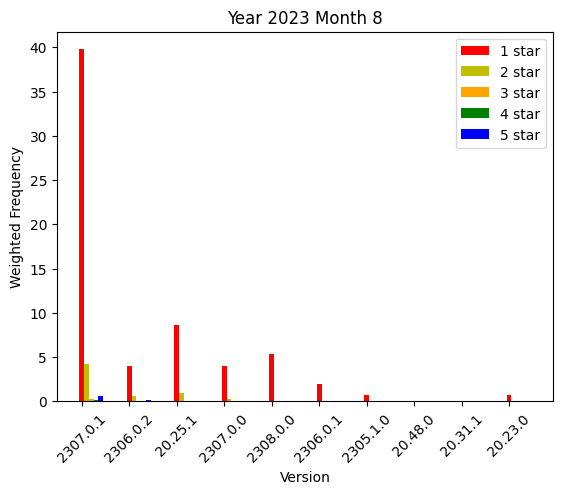

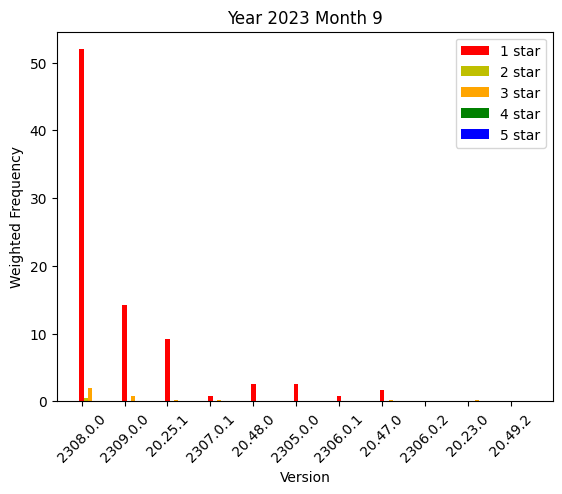

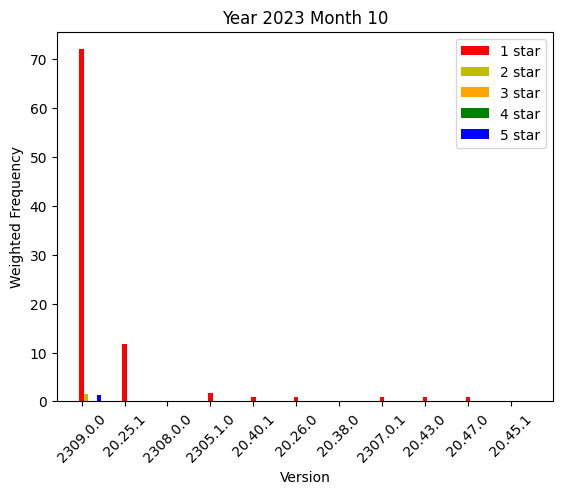

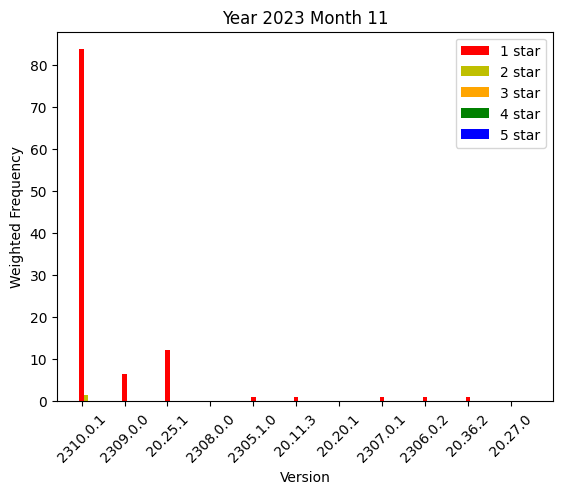

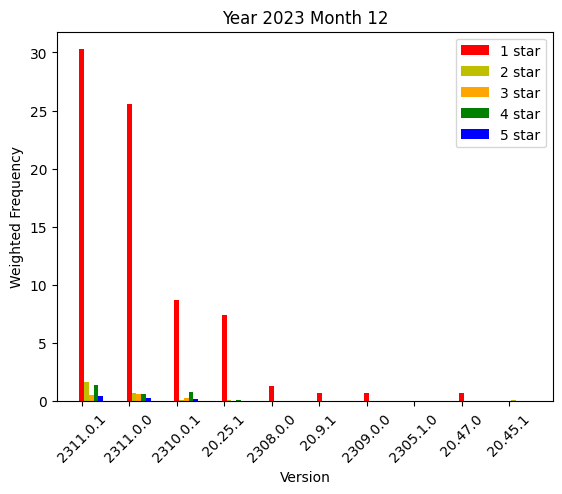

In [22]:
bar_year_rating(2023)

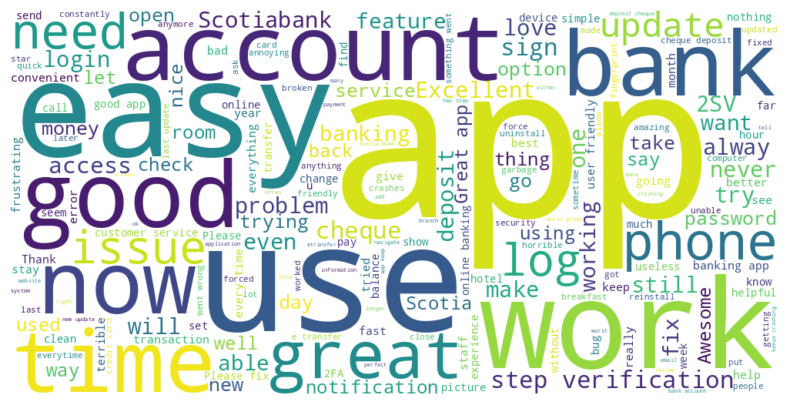

In [23]:
text_data = " ".join(text for text in df["Review"].values)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()